<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

## Assignment Objective
The aim of this assignment is to guide you through the process of understanding a dataset,
performing preprocessing, building classification models, including ensemble learning techniques,
and evaluation using cross-validation and various metrics.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori

#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

## Data Exploration


In [46]:
df = pd.read_csv('Student_dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17.0,5,171.0,1,1,122.0,1,19.0,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15.0,1,9254.0,1,1,160.0,1,1.0,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1.0,5,9070.0,1,1,122.0,1,37.0,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17.0,2,9773.0,1,1,122.0,1,38.0,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39.0,1,8014.0,0,1,100.0,1,37.0,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## List of datatypes, duplicates and Null-values 

In [21]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (4446, 37)
List of attributes:  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Cu

None

### List of data contained Null-values

In [48]:
df2 = df
df2.isna().sum()

Marital status                                     0
Application mode                                   2
Application order                                  0
Course                                             6
Daytime/evening attendance\t                       0
Previous qualification                             0
Previous qualification (grade)                     7
Nacionality                                        0
Mother's qualification                             3
Father's qualification                             0
Mother's occupation                                0
Father's occupation                                0
Admission grade                                   18
Displaced                                          3
Educational special needs                          0
Debtor                                             2
Tuition fees up to date                            0
Gender                                             0
Scholarship holder                            

#### From the above we can observe the list of attributes that contain NaN values: 
* Application mode
* Course
* Previous qualification (grade)
* Mother's qualification
* Admission grade
* Displaced
* Debtor
* Scholarship holder 
* Age at enrollment

In [95]:
# Check for duplicate rows
duplicates = df2.duplicated().sum()

# Display rows that are duplicates
print(f"Numbers of duplicated Rows: {duplicates}")

Numbers of duplicated Rows: 22


In [115]:
after_duplicates = df2.drop_duplicates()
print(f"Numbers of duplicates after drop {after_duplicates.shape}")

Numbers of duplicates after drop (4424, 37)


### Numerical Attributes with Null-values

In [116]:
# Select numerical columns
numerical_columns = df2.select_dtypes(['int64', 'float64'])

# Find numerical columns with null values
numerical_with_nulls = numerical_columns.columns[numerical_columns.isna().any()]

# Display only numerical columns with null values
print("Numerical columns with null values:")
print(numerical_with_nulls)

Numerical columns with null values:
Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Mother's qualification', 'Admission grade', 'Displaced', 'Debtor',
       'Scholarship holder', 'Age at enrollment'],
      dtype='object')


#### Numerical attributes description/normalization

In [118]:
# Describe only the numerical columns with null values
described_null_attributes = numerical_columns[numerical_with_nulls].describe()

# Display the description
print("Description of numerical attributes with null values:")
described_null_attributes

Description of numerical attributes with null values:


,Application mode,Course,Previous qualification (grade),Mother's qualification,Admission grade,Displaced,Debtor,Scholarship holder,Age at enrollment
count,4444.000000,4440.000000,4439.000000,4443.000000,4428.000000,4443.000000,4444.000000,4444.000000,4442.000000
mean,18.663816,8858.807432,132.640572,19.552104,126.986066,0.548728,0.113636,0.248650,23.268798
std,17.490937,2060.398841,13.221879,15.610384,14.480251,0.497676,0.317405,0.432279,7.595064
min,1.000000,33.000000,95.000000,1.000000,95.000000,0.000000,0.000000,0.000000,17.000000
25%,1.000000,9085.000000,125.000000,2.000000,117.900000,0.000000,0.000000,0.000000,19.000000
50%,17.000000,9238.000000,133.100000,19.000000,126.100000,1.000000,0.000000,0.000000,20.000000
75%,39.000000,9556.000000,140.000000,37.000000,134.800000,1.000000,0.000000,0.000000,25.000000
max,57.000000,9991.000000,190.000000,44.000000,190.000000,1.000000,1.000000,1.000000,70.000000


#### Fill in Null-values with means (numerical attributes)

In [120]:
# List of numerical attributes with null values
numerical_with_nulls = [
    'Application mode', 
    'Course', 
    'Previous qualification (grade)',
    "Mother's qualification", 
    'Admission grade', 
    'Displaced', 
    'Debtor', 
    'Scholarship holder', 
    'Age at enrollment'
]

# Replace null values with the mean for the specified columns
for col in numerical_with_nulls:
    if col in df2.columns:  # Ensure the column exists in the DataFrame
        df2[col].fillna(df2[col].mean(), inplace=True)

# Verify that null values are replaced
print("Null values after replacement:")
print(df2.isna().sum())  # Should show 0 for all columns


Null values after replacement:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder               

#### Categorial description 

In [121]:
#exploring categotical data
df.select_dtypes(['object']).describe()

,Target
count,4446
unique,3
top,Graduate
freq,2221


# Data Preprocessing

#### Collerration analysis

In [122]:
corr = df.corr(method = 'pearson')
corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264711,-0.126252,0.046659,-0.274427,0.063742,-0.023429,-0.009861,0.193879,0.130684,...,0.034238,0.061421,0.038564,0.023682,-0.044325,-0.071273,0.020022,-0.019977,0.008251,-0.025820
Application mode,0.264711,1.000000,-0.286173,0.062793,-0.304041,0.423106,-0.041266,-0.004277,0.121161,0.084391,...,0.045872,0.240074,0.131099,0.169097,-0.070380,-0.114590,0.048749,0.089021,-0.017239,-0.020105
Application order,-0.126252,-0.286173,1.000000,0.059212,0.158336,-0.184497,-0.064188,-0.021424,-0.066162,-0.051637,...,-0.031625,-0.125243,0.029251,-0.054840,0.072358,0.055239,-0.015718,-0.097589,-0.008600,0.028490
Course,0.046659,0.062793,0.059212,1.000000,-0.043118,0.006547,-0.075914,-0.031425,0.053705,0.051269,...,0.034391,-0.090346,0.397178,0.276103,0.197071,0.346475,0.030711,0.008759,0.019650,-0.023168
Daytime/evening attendance\t,-0.274427,-0.304041,0.158336,-0.043118,1.000000,-0.071042,0.053578,0.019307,-0.205014,-0.139847,...,0.045581,-0.110769,0.001202,0.015188,0.034062,0.050586,-0.004214,0.061924,-0.023199,0.022190
Previous qualification,0.063742,0.423106,-0.184497,0.006547,-0.071042,1.000000,0.102605,-0.029870,-0.013292,-0.005291,...,0.002502,0.143071,0.056518,0.115660,-0.009058,0.001236,0.005840,0.113288,-0.065223,0.064269
Previous qualification (grade),-0.023429,-0.041266,-0.064188,-0.075914,0.053578,0.102605,1.000000,0.050066,-0.058985,-0.032320,...,-0.002254,-0.019041,-0.030149,-0.061069,0.050054,0.054343,-0.016114,0.044138,0.017264,-0.052703
Nacionality,-0.009861,-0.004277,-0.021424,-0.031425,0.019307,-0.029870,0.050066,1.000000,-0.051628,-0.086937,...,0.008160,-0.008320,-0.020143,-0.027215,-0.019828,-0.007707,-0.014427,-0.001224,-0.008961,0.036123
Mother's qualification,0.193879,0.121161,-0.066162,0.053705,-0.205014,-0.013292,-0.058985,-0.051628,1.000000,0.534439,...,0.003339,0.043941,0.036584,0.022116,-0.014301,-0.030318,0.021404,-0.115334,0.060002,-0.081932
Father's qualification,0.130684,0.084391,-0.051637,0.051269,-0.139847,-0.005291,-0.032320,-0.086937,0.534439,1.000000,...,-0.016728,0.043728,0.024982,0.010015,0.006133,-0.007551,-0.006912,-0.079200,0.057110,-0.070986


C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


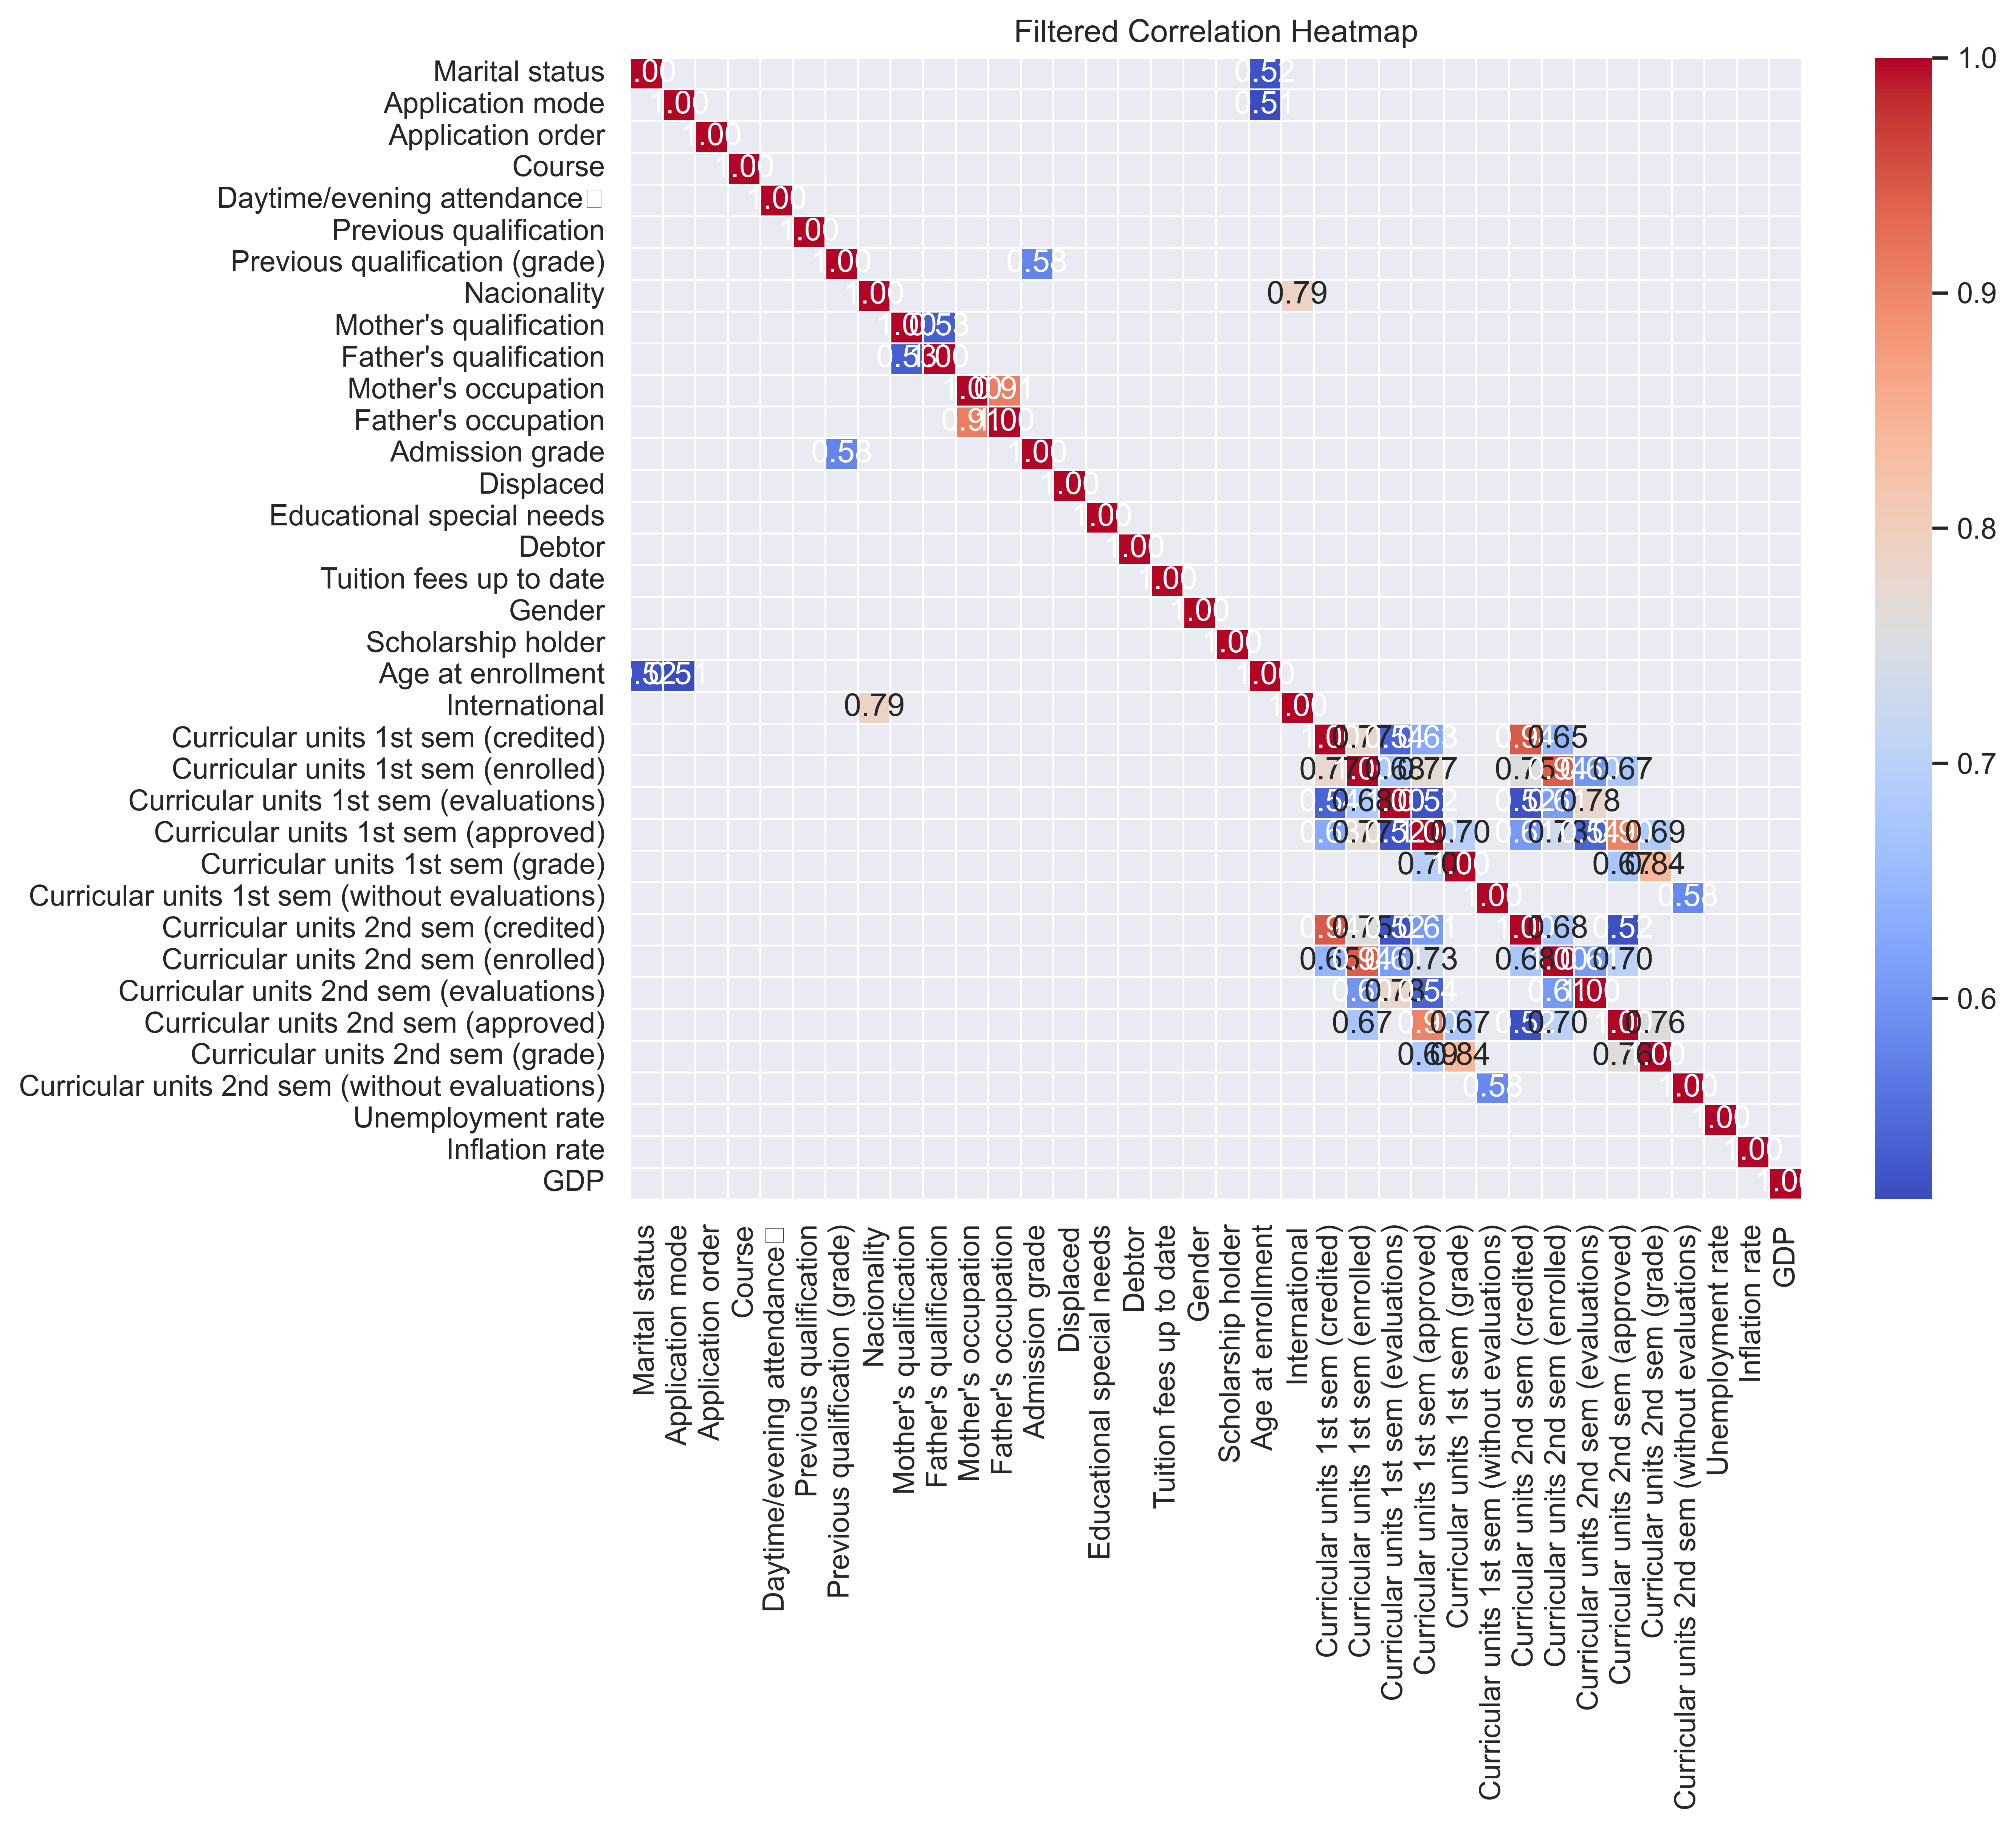

In [123]:
corr_threshold = 0.5
filtered_corr = corr[(corr > corr_threshold) | (corr < -corr_threshold)]

plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(filtered_corr, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Filtered Correlation Heatmap")
plt.show()

In [124]:
# Flatten the correlation matrix and sort
corr_flat = corr.unstack().reset_index()
corr_flat.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
corr_flat['AbsCorrelation'] = corr_flat['Correlation'].abs()

# Remove duplicates (e.g., "Attribute A - Attribute B" and "Attribute B - Attribute A")
corr_flat = corr_flat[corr_flat['Attribute 1'] != corr_flat['Attribute 2']]  # Remove self-correlations
top_10_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(20)
corr_flat = corr_flat.drop_duplicates(subset=['AbsCorrelation'])

# Sort by absolute correlation and select the top 10
top_10_unique_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(10)

# Display the top 10 correlations
print("Top 10 Highest Correlations:")
top_10_unique_corr[['Attribute 1', 'Attribute 2', 'Correlation']]


Top 10 Highest Correlations:


,Attribute 1,Attribute 2,Correlation
783,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.944527
820,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.942590
371,Mother's occupation,Father's occupation,0.910450
894,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.903340
931,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837285
272,Nacionality,International,0.788719
857,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.778841
778,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774612
816,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.768841
1111,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.759691


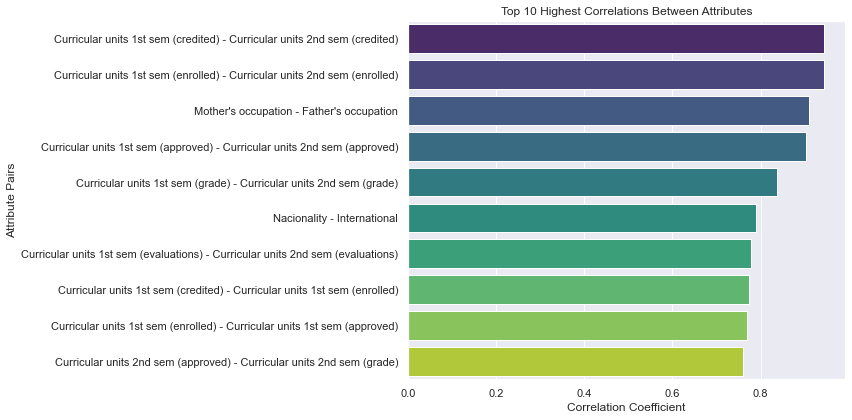

In [125]:
# Plot the Top 10 Correlations
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_unique_corr['Correlation'], 
    y=top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1),
    palette="viridis"
)
plt.title("Top 10 Highest Correlations Between Attributes")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute Pairs")
plt.tight_layout()
plt.show()

## HeatMap Collerration

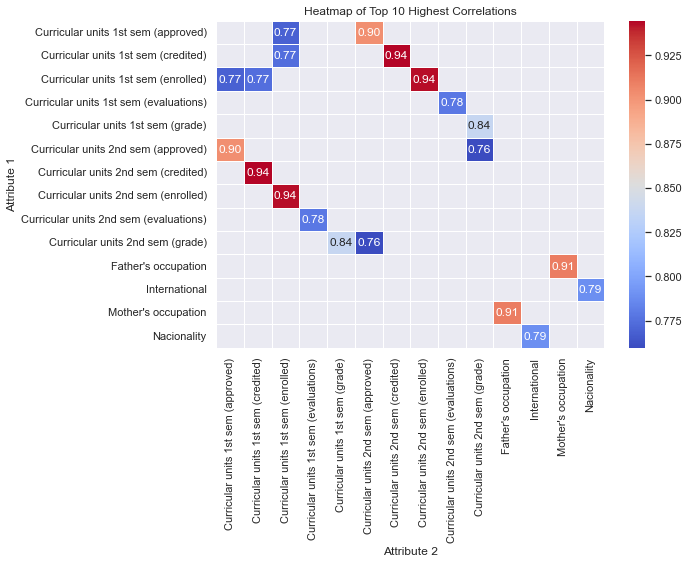

In [126]:
# Create a pivot table for the heatmap
heatmap_data = top_10_corr.pivot("Attribute 1", "Attribute 2", "Correlation")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 10 Highest Correlations")
plt.tight_layout()
plt.show()


### Curricular units 1st sem (credited)	Curricular units 2nd sem (credited)

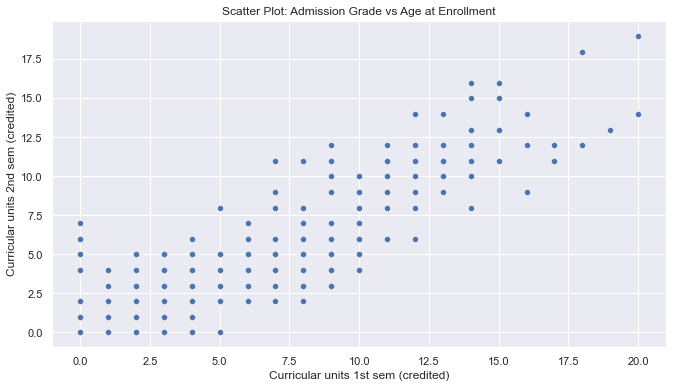

In [127]:
sns.scatterplot(x=df2['Curricular units 1st sem (credited)'], y=df2['Curricular units 2nd sem (credited)'])
plt.title("Scatter Plot: Admission Grade vs Age at Enrollment")
plt.show()

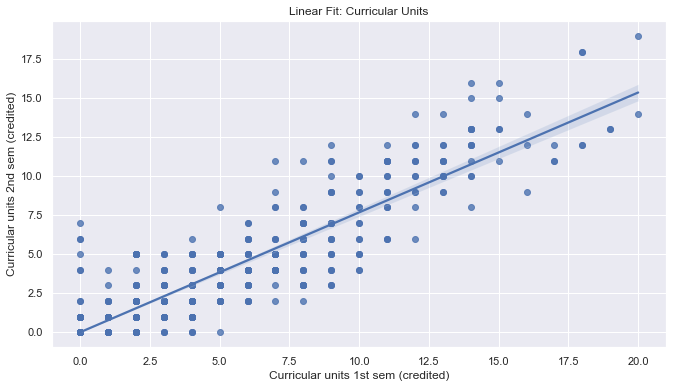

In [128]:
sns.regplot(x='Curricular units 1st sem (credited)', y='Curricular units 2nd sem (credited)', data=df2)
plt.title("Linear Fit: Curricular Units")
plt.show()


In [130]:
corr = df2[['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']].corr()
corr

,Curricular units 1st sem (credited),Curricular units 2nd sem (credited)
Curricular units 1st sem (credited),1.000000,0.944527
Curricular units 2nd sem (credited),0.944527,1.000000


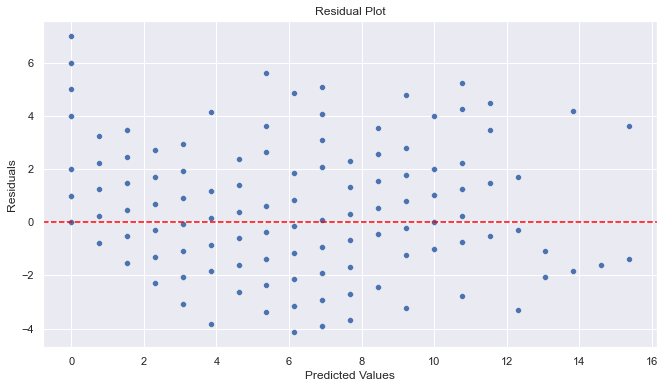

In [131]:
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression
X = df2[['Curricular units 1st sem (credited)']].dropna()  # Example feature
y = df2['Curricular units 2nd sem (credited)'].dropna()
model = LinearRegression()
model.fit(X, y)

# Residual plot
predictions = model.predict(X)
residuals = y - predictions

sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

## Data Classification

### Logistic Rigression

In [151]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define target and features
target_column = "Target"  # Replace with your target column name
X = df2.drop(columns=[target_column])  # Features
y = df2[target_column]  # Target

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)


In [152]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)


Logistic Regression Performance:
              precision    recall  f1-score   support

     Dropout       0.78      0.77      0.78       415
    Enrolled       0.52      0.28      0.37       254
    Graduate       0.78      0.92      0.84       665

    accuracy                           0.75      1334
   macro avg       0.69      0.66      0.66      1334
weighted avg       0.73      0.75      0.73      1334

Accuracy: 0.7511244377811095


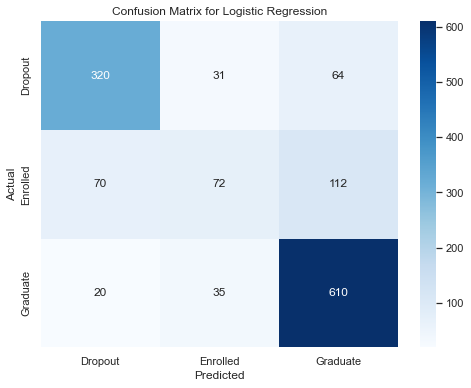

In [153]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [154]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
y_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=logreg.classes_[1])
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


ValueError: multi_class must be in ('ovo', 'ovr')